<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/materialy/cv10/mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Ak chceme ukladať súbory do nášho google drive musíme ho mountnúť.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Keras má predpripravené dáta z Datasetu MNIST. Načítame ich a a zobrazíme si jeden z obrázkov.

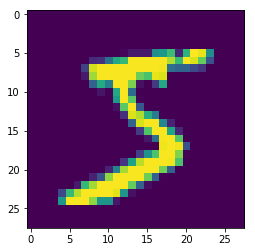

In [3]:
num_classes = 10
(x, y), (x_test, y_test) = mnist.load_data()

plt.imshow(x[0,:,:])
plt.show()

Obrázky sú v rozmeroch 28x28. Ak chceme použiť plne prepojenú sieť je nutné ich upraviť do vektorovej formy. Teda každý obrázok bude vektor s dimenziou 784. Trénovacie dáta si navyše rozdelíme na validačnú a trénovaciu množinu.

In [0]:
y_val = y[0:10000]
y_train = y[10000:]
x_val = np.reshape(x[0:10000],(10000,784)).\
            astype(np.float32)/255
x_train = np.reshape(x[10000:],(50000,784)).\
              astype(np.float32)/255

x_test = np.reshape(x_test,(10000,784)).\
              astype(np.float32)/255

Hodnoty v y-ových premenných označujú vždy len presne danú číslicu. My však chceme one-hot reprezentáciu.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Konečne môžeme pristúpiť k tvorbe modelu. Keďže použijeme len sekvenčný model, tak nám stačí popridávať plne prepojené vrstvy.

In [0]:
model = Sequential()
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

Takto sme zatiaľ definovali štruktúru modelu. Je nutné mu pridať cenovú funkciu a trénovací algoritmus (toto vytvorí v tensorflowe štruktúru, ktorá zabezbečuje tréning).

In [7]:
loss = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adam()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


V prípade, že si chceme ukladať model priebežne pri trénovaní môžeme odkomentovať túto časť.

In [0]:
callbacks = []
#checkpoint = keras.callbacks.ModelCheckpoint(
#    root_path + 'mnist_{epoch:02d}-{val_loss:.8f}-{val_acc:.4f}.hdf5',
#    verbose=1)
#callbacks.append(checkpoint)

Model natrénujeme!

In [9]:
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s 29us/step - loss: 1.2204 - acc: 0.7414 - val_loss: 0.5631 - val_acc: 0.8873
Epoch 2/10
50000/50000 [==============================] - 1s 25us/step - loss: 0.4307 - acc: 0.8989 - val_loss: 0.3327 - val_acc: 0.9145
Epoch 3/10
50000/50000 [==============================] - 1s 25us/step - loss: 0.3012 - acc: 0.9199 - val_loss: 0.2611 - val_acc: 0.9289
Epoch 4/10
50000/50000 [==============================] - 1s 25us/step - loss: 0.2447 - acc: 0.9327 - val_loss: 0.2259 - val_acc: 0.9355
Epoch 5/10
50000/50000 [==============================] - 1s 25us/step - loss: 0.2083 - acc: 0.9423 - val_loss: 0.2006 - val_acc: 0.9435
Epoch 6/10
50000/50000 [==============================] - 1s 25us/step - loss: 0.1821 - acc: 0.9484 - val_loss: 0.1811 - val_acc: 0.9472
Epoch 7/10
50000/50000 [==============================] - 1s 25us/step - loss: 0

Funkcia fit vracia dict history, ktorý obsahuje informácie o priebehu trénovania.

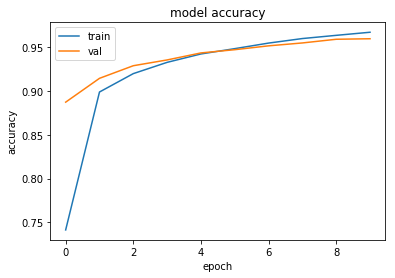

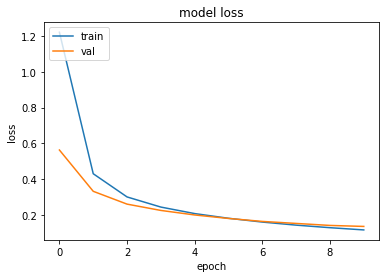

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Natrénovný model môžeme spustiť na dáta jednotlivo. Je nutné ale pridať jednu singleton dimenziu.

[[5.1373794e-05 1.5708584e-04 6.3454418e-04 9.9337951e-04 2.6530748e-05
  7.4540279e-05 9.4616649e-07 9.9705410e-01 6.1563328e-06 1.0012928e-03]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<function matplotlib.pyplot.show>

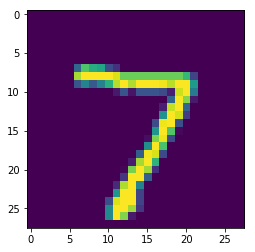

In [11]:
pred = model.predict(x_test[np.newaxis, 0, :])
print(pred)
print(y_test[0,:])
plt.imshow(np.reshape(x_test[0],(28,28)))
plt.show

Môžeme vyhodnotiť presnosť dát na testovacej množine.

In [12]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 27us/step
Test loss: 0.13237439200505613
Test accuracy: 0.9609


Model si môžeme uložiť.

In [0]:
model.save(root_path + 'mnist-fc-trained.h5')